# Filtered Local Level Model

Local level model, just like the other one, but filtering out the local variables using the Kalman filter.

In [1]:
import torch
import ptvi
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 12]

In [2]:
true_params = dict(γ=0., η=2., ρ=0.95, σ=1.5)
τ = 100
algo_seed, data_seed = 123, 123

In [3]:
fll = ptvi.models.FilteredLocalLevelModel(input_length=τ)

In [4]:
torch.manual_seed(data_seed)
y, z = fll.simulate(**true_params)

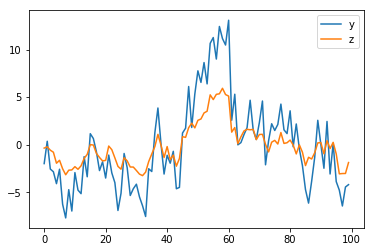

In [5]:
plt.plot(y.numpy(), label='y')
plt.plot(z.numpy(), label='z')
plt.legend();

## SGVB inference

In [6]:
torch.manual_seed(algo_seed)
fit = ptvi.sgvb(fll, y, optimizer_type=torch.optim.Adamax, lr=0.01)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Structured SGVB Inference: Filtered local level model
  - Estimating elbo with M=1;
  - Minimum supremum growth heuristic (min_steps=1000, patience=20, skip=10, ε=0.1)
  - Adamax optimizer with param groups:
    group 0. lr=0.01, betas=(0.9, 0.999), eps=1e-08, weight_decay=0
  - Displayed loss is smoothed with λ=0.1
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
       0. smoothed elbo = -711.76
       1. smoothed elbo = -669.76
       2. smoothed elbo = -631.13
       4. smoothed elbo = -611.56
       8. smoothed elbo = -508.48
      16. smoothed elbo = -422.38
      32. smoothed elbo = -400.98
      64. smoothed elbo = -422.76
     128. smoothed elbo = -574.35
     256. smoothed elbo = -389.84
     512. smoothed elbo = -363.58
    1024. smoothed elbo = -283.27
Stopping heuristic criterion satisfied
    1100. smoothed elbo =     -298.45
Completed 1101 iterations in 21.4s 

In [7]:
fit.summary()

,mean,sd
z0,-0.919017,2.289120
σz0,2.827012,2.317089
γ,0.785718,2.758071
η,2.086104,1.743596
σ,2.046613,1.630365
ρ,0.620135,0.167139


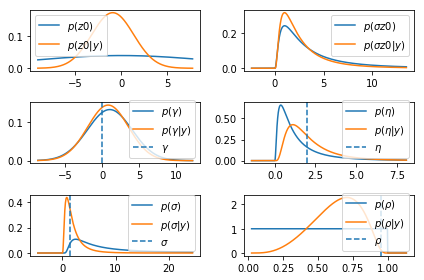

In [8]:
fit.plot_global_marginals(**true_params)

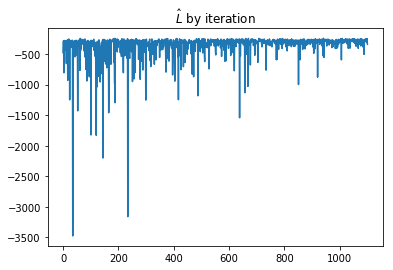

In [9]:
fit.plot_elbos()

## MAP inference

In [10]:
torch.manual_seed(algo_seed)
fit_map = ptvi.map(fll, y)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
MAP inference with L-BGFS: Filtered local level model
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
       0. log joint = -436.5756
       1. log joint = -251.0042
       2. log joint = -250.9995
       3. log joint = -250.9995
Convergence criterion met.
       3. log joint = -250.9995
Completed 4 iterations in 0.64s @ 6.21 i/s.
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


In [11]:
fit_map.summary()

,mean,sd
z0,-0.971275,2.041381
σz0,2.027174,1.639236
γ,1.000000,3.000000
η,1.797401,0.233320
σ,1.639561,0.212919
ρ,0.894807,0.042038


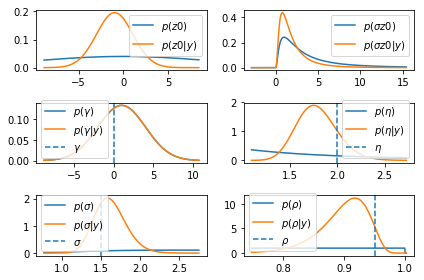

In [12]:
fit_map.plot_global_marginals(**true_params)

## MAP + SGVB inference

Much faster, but less stable.

In [13]:
torch.manual_seed(algo_seed)
fit_map = ptvi.map(fll, y)
u0, L0 = fit_map.initial_conditions()
stop_heur = ptvi.SupGrowthStoppingHeuristic(skip=1)
fit_ms = ptvi.sgvb(fll, y, u0=u0, L0=L0, stop_heur=stop_heur)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
MAP inference with L-BGFS: Filtered local level model
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
       0. log joint = -436.5756
       1. log joint = -251.0042
       2. log joint = -250.9995
       3. log joint = -250.9995
Convergence criterion met.
       3. log joint = -250.9995
Completed 4 iterations in 0.67s @ 6.00 i/s.
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Structured SGVB Inference: Filtered local level model
  - Estimating elbo with M=1;
  - Minimum supremum growth heuristic (min_steps=100, patience=20, skip=1, ε=0.1)
  - Adadelta optimizer with param groups:
    group 0. lr=1.0, rho=0.9, eps=1e-06, weight_decay=0
  - Displayed loss is smoothed with λ=0.1
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
    

In [14]:
fit_ms.summary()

,mean,sd
z0,-0.948825,2.042418
σz0,2.591413,2.387058
γ,0.940535,3.042112
η,1.874072,0.289944
σ,1.657616,0.290625
ρ,0.900712,0.042067


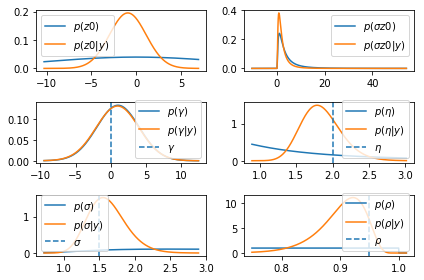

In [15]:
fit_ms.plot_global_marginals(**true_params)